In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Position_Salaries.csv')
X = df.iloc[: , 1:-1].values
y = df.iloc[: , -1].values

In [3]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

Here we have to apply feature scaling on dependent as well as independent variables , because the values of y are much higher than those of X as a result SVM could neglect them .

Also we have to convert y into a 2D array since standard scaler takes a 2D array for fitting 

In [4]:
y = y.reshape(len(y),1)

In [5]:
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [7]:
sc_y = StandardScaler()
y = sc_y.fit_transform(y)
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

In [8]:
from sklearn.svm import SVR
regr = SVR(kernel="rbf")
regr.fit(X,y)

C:\Users\Aryan Tambe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

Prediction

In [15]:
sc_y.inverse_transform(regr.predict(sc.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

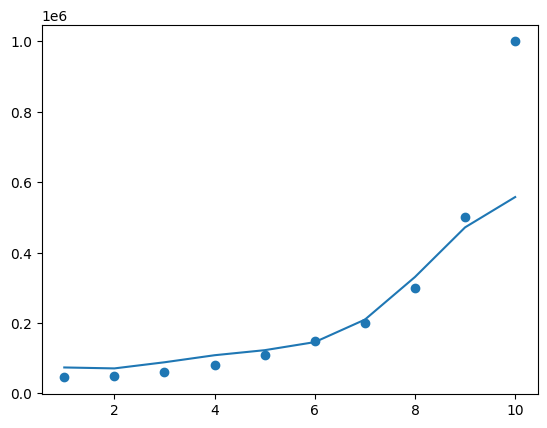

In [22]:
plt.scatter(sc.inverse_transform(X),sc_y.inverse_transform(y))
plt.plot(sc.inverse_transform(X),sc_y.inverse_transform(regr.predict(X).reshape(-1,1)))